# Supervised Machine Learning  

Sergio Amórtegui Ardila, Ligia Priscila Coque Micán, Juan Sotelo Aguilar

## Sheet 1  

### Exercise 1 (2 Points)  

1. Write functions $entropy(probs)$ and $gini(probs)$ that receive numpy arrays $probs$  
   assuming the probability vector describing a class distribution and that return the entropy/  
   gini index, respectively.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
def entropy(probs):
    # Si alguna de las frecuencias es cero, se elimina
    if 0 in probs:
        probs = probs[probs != 0]
    # Calculamos frecuencias
    # probabilities = probs / np.sum(probs)
    probabilities = probs
    # Calculamos entropía
    entropy = float(-np.sum(probabilities * np.log2(probabilities)))
    return entropy

def gini(probs):
    # Calculamos frecuencias
    # probabilities = probs / np.sum(probs)
    probabilities = probs
    # Calculamos gini
    gini = float(1 - np.sum(np.square(probabilities)))
    return gini



2. Create a $2 \times 2$ plot grid. In the first column, we consider a 2-class problem and consider  
   the probability of the positive class on the x-axis. The y-axis should show the entropy  
   and gini-index (first row and second row, respectively).  

   In the 2nd column, we create 3D surface plots for a 3-class problem where the x-axis  
   and y-axis show the portion of the first and second class respectively (the portion of  
   the third class is implicit). The z-axis should again show the entropy and the gini-index  
   respectively.  

In [ ]:
# Primera columna

# Listas para almacenar valores
E, G, P = [], [], []
# Calculamos la entropía y Gini
for i in range(100):
    # Definimos porcentajes de i
    P.append(i/100)
    # Calculamos Gini y entropía
    E.append(entropy([i,100-i]))
    G.append(gini([i,100-i]))
# Ponemos todo en un dataframe
data_1 = pd.DataFrame(list(zip(P, E, G)), columns=['p_i', 'Entropía', 'Gini'])

# Segunda columna

# Listas para almacenar los resultados
E, G, p_i, p_j = [], [], [], []

# Creamos un ciclo for anidado para crear los valores
for i in range(101):
    for j in range(101 - i):
      # Creamos un array de siempre suma 100
        arr = np.array([i, j, (100 - i - j)])
      # Calculamos porcentajes
        P = arr / 100.0
      # Creamos dos columnas para la gráfica
        p_i.append(P[0]),p_j.append(P[1])
      # Calculamos gini y entropía
        E.append(entropy(P))
        G.append(gini(P))

data_2 = pd.DataFrame(list(zip(p_i, p_j, E, G)), columns=['p_i', 'p_j', 'Entropía', 'Gini'])
print(data_2)

       p_i   p_j  Entropía    Gini
0     0.00  0.00 -0.000000  0.0000
1     0.00  0.01  0.080793  0.0198
2     0.00  0.02  0.141441  0.0392
3     0.00  0.03  0.194392  0.0582
4     0.00  0.04  0.242292  0.0768
...    ...   ...       ...     ...
5146  0.98  0.01  0.161441  0.0394
5147  0.98  0.02  0.141441  0.0392
5148  0.99  0.00  0.080793  0.0198
5149  0.99  0.01  0.080793  0.0198
5150  1.00  0.00 -0.000000  0.0000

[5151 rows x 4 columns]


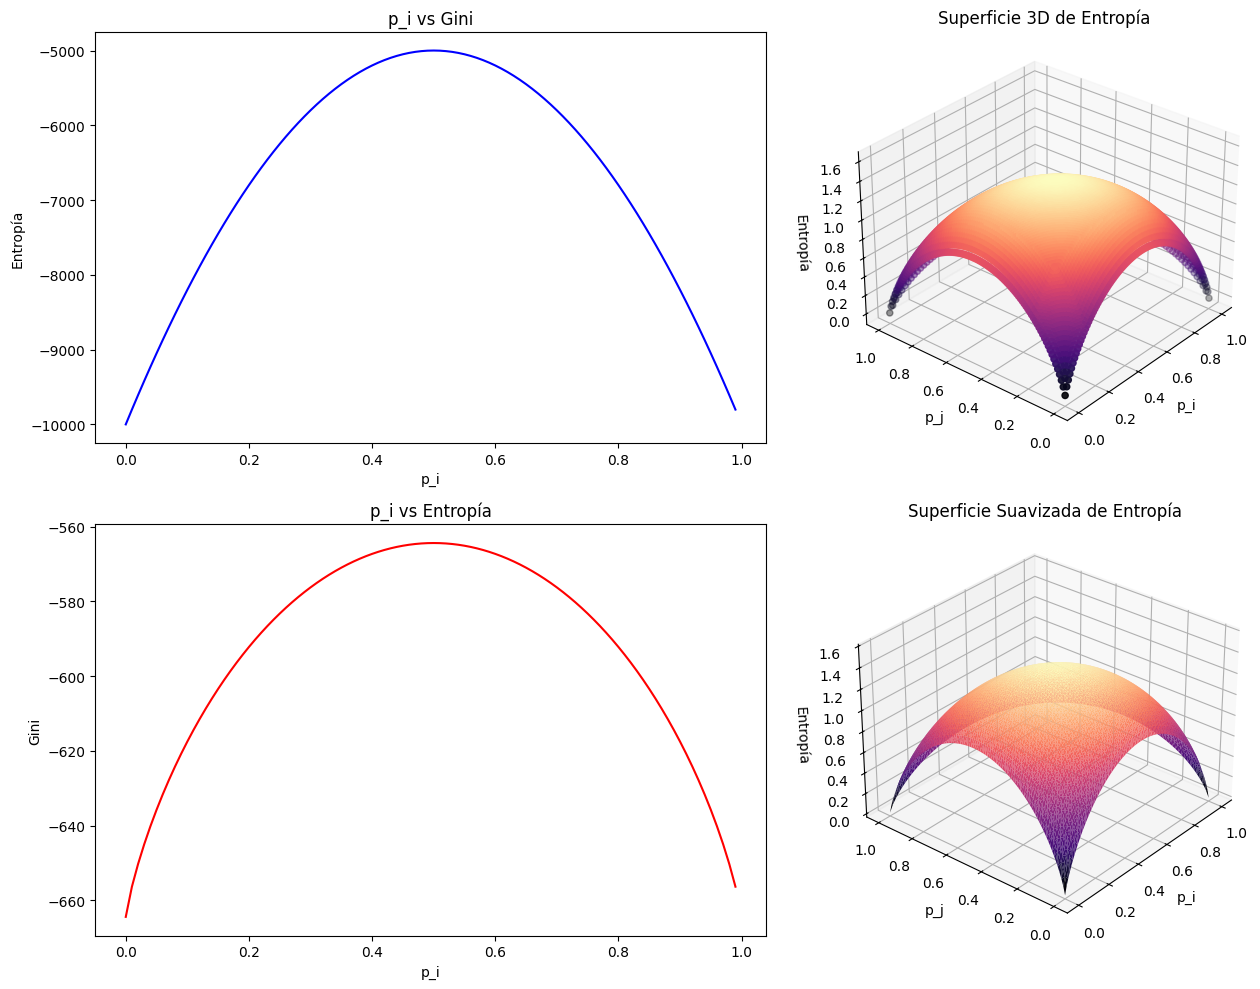

In [ ]:
# Creamos la figura con una malla 2x2
fig = plt.figure(figsize=(14, 10))

# Subgráfica 1: Relación entre p_i y Entropía (arriba izquierda)
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(data_1["p_i"], data_1["Gini"], color='blue')
ax1.set_xlabel("p_i")
ax1.set_ylabel("Entropía")
ax1.set_title("p_i vs Gini")

# Subgráfica 2: Relación entre p_i y Gini (abajo izquierda)
ax2 = fig.add_subplot(2, 2, 3)
ax2.plot(data_1["p_i"], data_1["Entropía"], color='red')
ax2.set_xlabel("p_i")
ax2.set_ylabel("Gini")
ax2.set_title("p_i vs Entropía")

# Subgráfica 3: Gráfico 3D de Entropía (arriba derecha)
ax3 = fig.add_subplot(2, 2, 2, projection='3d')
ax3.scatter(data_2['p_i'], data_2['p_j'], data_2['Entropía'], c=data_2['Entropía'], cmap='magma')
ax3.set_xlabel("p_i")
ax3.set_ylabel("p_j")
ax3.set_zlabel("Entropía")
ax3.set_title("Superficie 3D de Entropía")
ax3.view_init(elev=30, azim=220)

# Subgráfica 4: Otro gráfico 3D de Entropía (abajo derecha) con otra visualización
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.plot_trisurf(data_2['p_i'], data_2['p_j'], data_2['Entropía'], cmap='magma', edgecolor='none')
ax4.set_xlabel("p_i")
ax4.set_ylabel("p_j")
ax4.set_zlabel("Entropía")
ax4.set_title("Superficie Suavizada de Entropía")
ax4.view_init(elev=30, azim=220)

plt.tight_layout()
plt.show()



### Exercise 2 (5 Points)  

1. Write functions $gain\_in\_entropy(cnts\_y, cnts\_n)$, $gain\_in\_gini(cnts\_y, cnts\_n)$,  $cart(cnts\_y, cnts\_n)$ that receive two numpy arrays of same lengths with the number of counts for class $i$ in the $i$-th position. Compute the respective gains in entropy or gini index, and the CART  
   coefficient, respectively.

In [ ]:
def gain_in_entropy(cnts_y, cnts_n):
    cnts_y = np.array(cnts_y)
    cnts_n = np.array(cnts_n)
    parent = cnts_y + cnts_n
    total = np.sum(parent)
    # Parent entropy
    p_parent = parent / total
    parent_entropy = entropy(p_parent)

    # Left child
    total_y = np.sum(cnts_y)
    if total_y > 0:
        p_y = cnts_y / total_y
        entropy_y = entropy(p_y)
    else:
        entropy_y = 0.

    # Right child
    total_n = np.sum(cnts_n)
    if total_n > 0:
        p_n = cnts_n / total_n
        entropy_n = entropy(p_n)
    else:
        entropy_n = 0.

    weighted_entropy = (total_y/total)*entropy_y + (total_n/total)*entropy_n
    return parent_entropy - weighted_entropy

def gain_in_gini(cnts_y, cnts_n):
    cnts_y = np.array(cnts_y)
    cnts_n = np.array(cnts_n)
    parent = cnts_y + cnts_n
    total = np.sum(parent)
    p_parent = parent / total
    parent_gini = gini(p_parent)

    total_y = np.sum(cnts_y)
    if total_y > 0:
        p_y = cnts_y / total_y
        gini_y = gini(p_y)
    else:
        gini_y = 0.

    total_n = np.sum(cnts_n)
    if total_n > 0:
        p_n = cnts_n / total_n
        gini_n = gini(p_n)
    else:
        gini_n = 0.

    weighted_gini = (total_y/total)*gini_y + (total_n/total)*gini_n
    return parent_gini - weighted_gini

def cart(cnts_y, cnts_n):
    cnts_y = np.array(cnts_y)
    cnts_n = np.array(cnts_n)

    # Total samples in each subset
    total_y = np.sum(cnts_y)
    total_n = np.sum(cnts_n)
    total = total_y + total_n

    if total_y == 0 or total_n == 0:
        return 0.0  # No split occurs

    # Compute class probabilities for each subset
    prob_y = cnts_y / total_y
    prob_n = cnts_n / total_n

    # Compute CART measure
    cart_value = 2 * (total_y / total) * (total_n / total) * np.sum(np.abs(prob_y - prob_n))

    return cart_value

# Example: binary split for a 2-class problem.
cnts_left = [30, 10]   # left node counts for classes 0 and 1
cnts_right = [20, 40]  # right node counts
print("Entropy gain:", gain_in_entropy(cnts_left, cnts_right))
print("Gini gain:", gain_in_gini(cnts_left, cnts_right))
print("CART coefficient:", cart(cnts_left, cnts_right))

Entropy gain: 0.12451124978365313
Gini gain: 0.08333333333333331
CART coefficient: 0.39999999999999997


2. Write a function $get\_gains(df, label, gain)$ where $df$ is a dataframe, $label$ is the  
   name of the column with the label (classification or regression), and $gain$ is a function  
   that receives two count arguments (as in the previous point). We assume that all attributes  
   (except, maybe, the label) are numeric. The function should return a dictionary  
   with keys being attribute names and values being tuples $(v\_list, s\_list)$, where the first  
   is the list of possible thresholds and the second the score of the respective metric for  
   that threshold.

In [ ]:
def get_gains(df, label, gain):
    gains_dict = {}
    for col in df.columns:
        if col == label:
            continue
        # Consider only numeric attributes
        if not np.issubdtype(df[col].dtype, np.number):
            continue
        # Midpoints between consecutive values
        M = []
        for i in range(len(df[col]) - 1):
            left_term = df[col].iloc[i]
            right_term = df[col].iloc[i + 1]
            if (left_term != right_term):
                M.append((left_term + right_term) / 2)

        v_list = []
        s_list = []
        for thresh in M:
            # Split the dataset at threshold
            left = df[df[col] <= thresh]
            right = df[df[col] > thresh]
            # Get counts per class for left and right nodes
            # We assume label is categorical
            classes = df[label].unique()
            cnts_left = np.array([np.sum(left[label] == c) for c in classes])
            cnts_right = np.array([np.sum(right[label] == c) for c in classes])
            # Compute gain
            score = gain(cnts_left, cnts_right)
            v_list.append(thresh)
            s_list.append(score)
        gains_dict[col] = (v_list, s_list)
    return gains_dict

# Create a simple dataframe for demonstration.
df_demo = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 3, 1, 2, 4],
    'label': ['A', 'A', 'B', 'B', 'B']
})
gains = [gain_in_entropy, gain_in_gini, cart]
for gain in gains:
    print(f"Using {gain.__name__}")
    demo_gains = get_gains(df_demo, 'label', gain)
    for attr, (thresholds, scores) in demo_gains.items():
        print(f"Attribute: {attr}")
        print("Thresholds:", thresholds)
        print("Scores:", scores)

Using gain_in_entropy
Attribute: feature1
Thresholds: [np.float64(1.5), np.float64(2.5), np.float64(3.5), np.float64(4.5)]
Scores: [np.float64(0.3219280948873623), np.float64(0.9709505944546686), np.float64(0.4199730940219749), np.float64(0.17095059445466854)]
Attribute: feature2
Thresholds: [np.float64(4.0), np.float64(2.0), np.float64(1.5), np.float64(3.0)]
Scores: [np.float64(0.3219280948873623), np.float64(0.4199730940219749), np.float64(0.17095059445466854), np.float64(0.01997309402197489)]
Using gain_in_gini
Attribute: feature1
Thresholds: [np.float64(1.5), np.float64(2.5), np.float64(3.5), np.float64(4.5)]
Scores: [np.float64(0.17999999999999994), np.float64(0.48), np.float64(0.21333333333333332), np.float64(0.07999999999999996)]
Attribute: feature2
Thresholds: [np.float64(4.0), np.float64(2.0), np.float64(1.5), np.float64(3.0)]
Scores: [np.float64(0.17999999999999994), np.float64(0.21333333333333332), np.float64(0.07999999999999996), np.float64(0.013333333333333308)]
Using cart

 3. Apply the function for the full iris, wine, blood, and heart datasets. Normalize all  
   columns before the procedure. Then create one figure for each criterion (3 per dataset)  
   where you show the split point scores for each attribute (one curve per attribute; use  
   labels and a legend).  

   - (a) Are there datasets where the choice of the initial split point would be different for  
   different metrics?  
   - (b) Are the shapes generally uni-modal? What is special about CART?

In [ ]:
!pip install ucimlrepo

Primer punto de corte para 'sepal length (cm)' en Iris con Entropy Gain: umbral = -1.0218490407414595, ganancia = 0.2616484973584483
Primer punto de corte para 'sepal width (cm)' en Iris con Entropy Gain: umbral = 0.44351243632499115, ganancia = 0.2639028609497909
Primer punto de corte para 'petal length (cm)' en Iris con Entropy Gain: umbral = -1.368645240079564, ganancia = 0.12485247675137368
Primer punto de corte para 'petal width (cm)' en Iris con Entropy Gain: umbral = -1.1838121107174393, ganancia = 0.6195148513196114


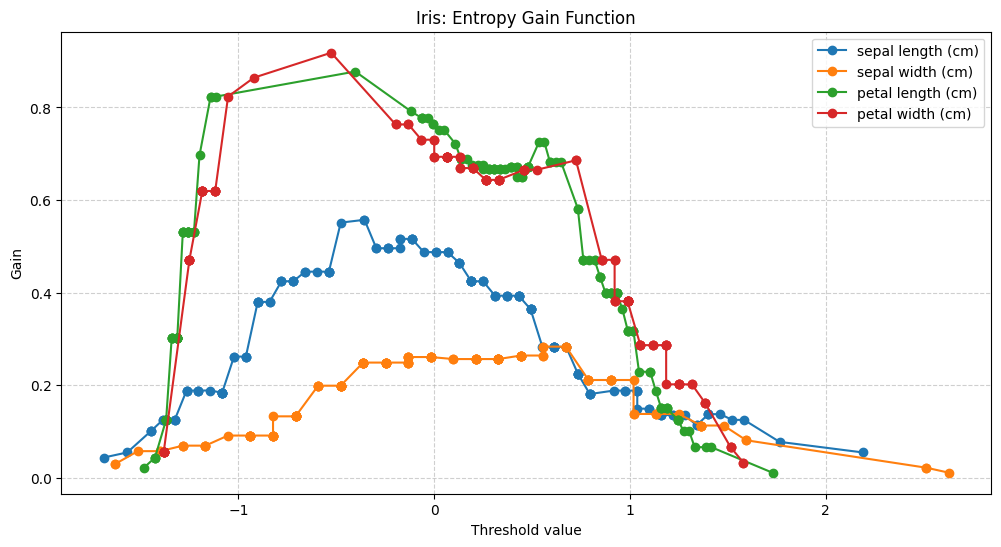

Primer punto de corte para 'sepal length (cm)' en Iris con Gini Gain: umbral = -1.0218490407414595, ganancia = 0.11987994350282494
Primer punto de corte para 'sepal width (cm)' en Iris con Gini Gain: umbral = 0.44351243632499115, ganancia = 0.11751068608273563
Primer punto de corte para 'petal length (cm)' en Iris con Gini Gain: umbral = -1.368645240079564, ganancia = 0.052757793764988126
Primer punto de corte para 'petal width (cm)' en Iris con Gini Gain: umbral = -1.1838121107174393, ganancia = 0.25076452599388394


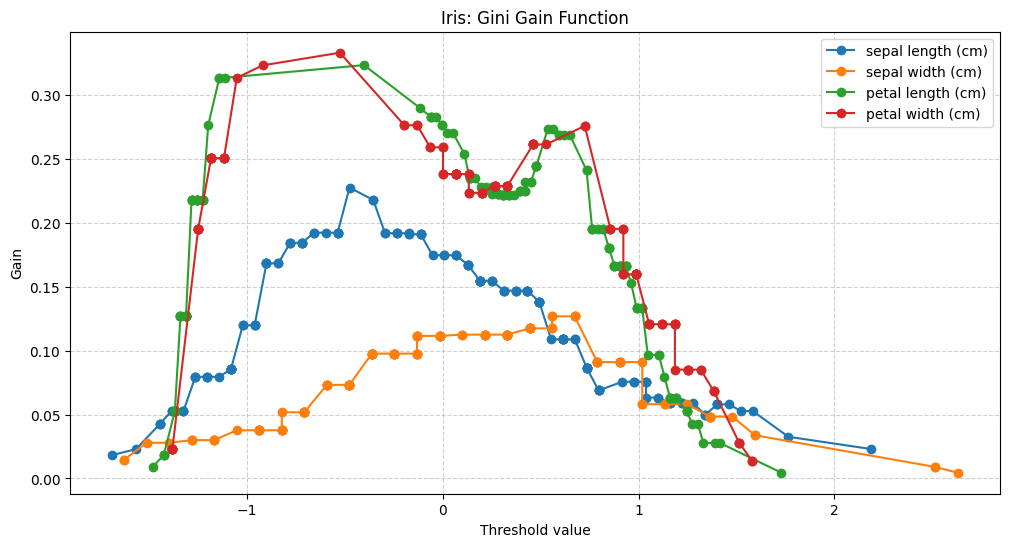

Primer punto de corte para 'sepal length (cm)' en Iris con CART Coefficient: umbral = -1.0218490407414595, ganancia = 0.4622222222222223
Primer punto de corte para 'sepal width (cm)' en Iris con CART Coefficient: umbral = 0.44351243632499115, ganancia = 0.49777777777777776
Primer punto de corte para 'petal length (cm)' en Iris con CART Coefficient: umbral = -1.368645240079564, ganancia = 0.19555555555555557
Primer punto de corte para 'petal width (cm)' en Iris con CART Coefficient: umbral = -1.1838121107174393, ganancia = 0.7288888888888889


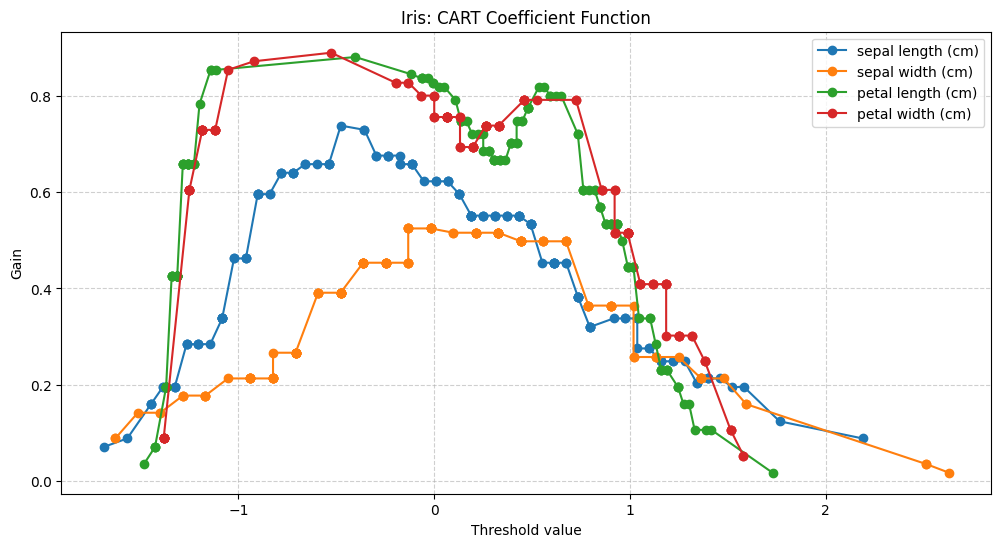

Primer punto de corte para 'alcohol' en Wine con Entropy Gain: umbral = 0.8824510840021004, ganancia = 0.24630170879594582
Primer punto de corte para 'malic_acid' en Wine con Entropy Gain: umbral = -0.5308315882327644, ganancia = 0.13640291543822203
Primer punto de corte para 'ash' en Wine con Entropy Gain: umbral = -0.2979718911357282, ganancia = 0.08790355486872414
Primer punto de corte para 'alcalinity_of_ash' en Wine con Entropy Gain: umbral = -1.8302201580590611, ganancia = 0.031284434152593965
Primer punto de corte para 'magnesium' en Wine con Entropy Gain: umbral = 0.9660251190912854, ganancia = 0.03212926121966975
Primer punto de corte para 'total_phenols' en Wine con Entropy Gain: umbral = 0.6888225285105561, ganancia = 0.20495861701233187
Primer punto de corte para 'flavanoids' en Wine con Entropy Gain: umbral = 0.884223949780103, ganancia = 0.25977002064864063
Primer punto de corte para 'nonflavanoid_phenols' en Wine con Entropy Gain: umbral = -0.7401411749408238, ganancia =

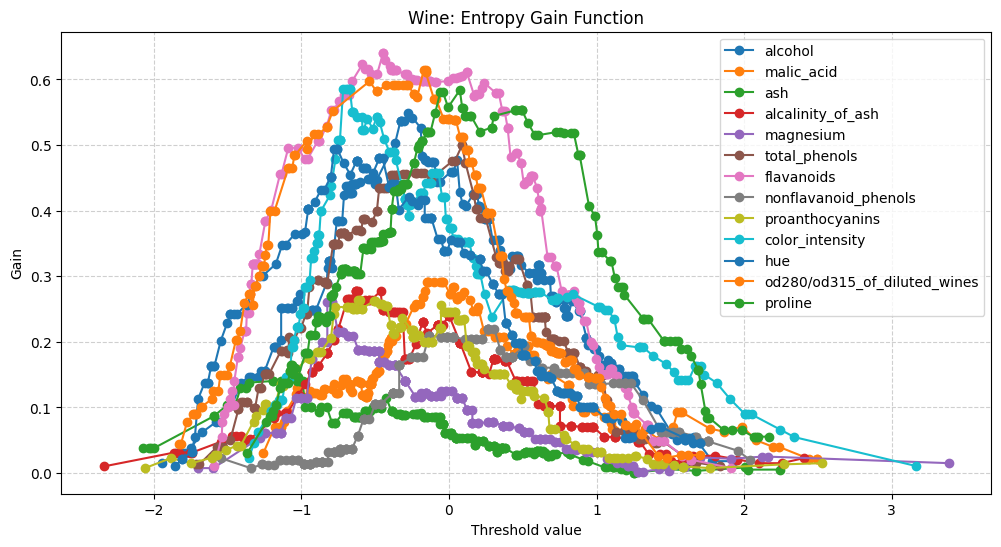

Primer punto de corte para 'alcohol' en Wine con Gini Gain: umbral = 0.8824510840021004, ganancia = 0.11197228092969091
Primer punto de corte para 'malic_acid' en Wine con Gini Gain: umbral = -0.5308315882327644, ganancia = 0.052760091665716824
Primer punto de corte para 'ash' en Wine con Gini Gain: umbral = -0.2979718911357282, ganancia = 0.04377409139276334
Primer punto de corte para 'alcalinity_of_ash' en Wine con Gini Gain: umbral = -1.8302201580590611, ganancia = 0.013204033239088808
Primer punto de corte para 'magnesium' en Wine con Gini Gain: umbral = 0.9660251190912854, ganancia = 0.016163728662649035
Primer punto de corte para 'total_phenols' en Wine con Gini Gain: umbral = 0.6888225285105561, ganancia = 0.08007192650084416
Primer punto de corte para 'flavanoids' en Wine con Gini Gain: umbral = 0.884223949780103, ganancia = 0.10644934024613517
Primer punto de corte para 'nonflavanoid_phenols' en Wine con Gini Gain: umbral = -0.7401411749408238, ganancia = 0.015198968014269232


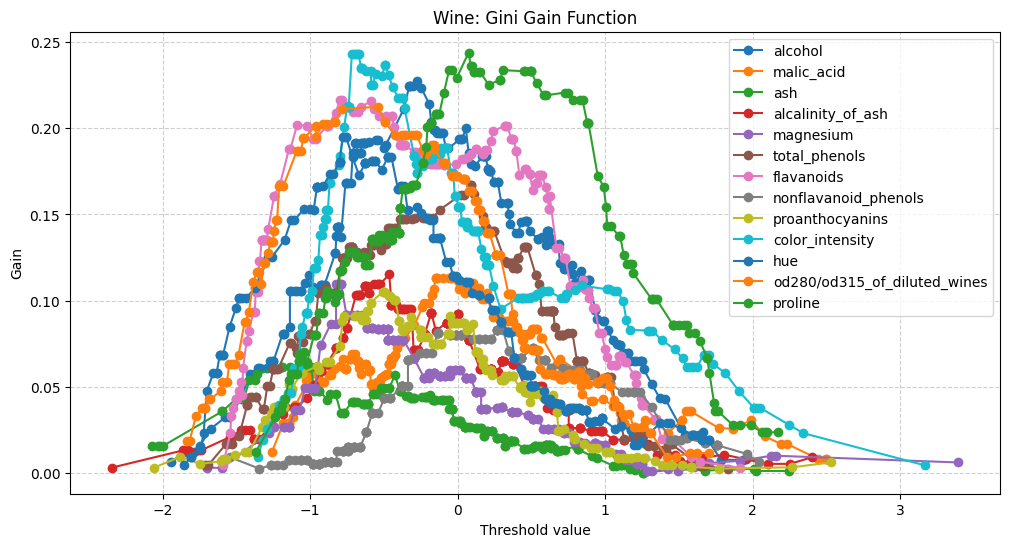

Primer punto de corte para 'alcohol' en Wine con CART Coefficient: umbral = 0.8824510840021004, ganancia = 0.43618230021461946
Primer punto de corte para 'malic_acid' en Wine con CART Coefficient: umbral = -0.5308315882327644, ganancia = 0.34212851912637293
Primer punto de corte para 'ash' en Wine con CART Coefficient: umbral = -0.2979718911357282, ganancia = 0.32975634389597275
Primer punto de corte para 'alcalinity_of_ash' en Wine con CART Coefficient: umbral = -1.8302201580590611, ganancia = 0.06766822370912765
Primer punto de corte para 'magnesium' en Wine con CART Coefficient: umbral = 0.9660251190912854, ganancia = 0.14341623532382272
Primer punto de corte para 'total_phenols' en Wine con CART Coefficient: umbral = 0.6888225285105561, ganancia = 0.40664057568488826
Primer punto de corte para 'flavanoids' en Wine con CART Coefficient: umbral = 0.884223949780103, ganancia = 0.4512056558515339
Primer punto de corte para 'nonflavanoid_phenols' en Wine con CART Coefficient: umbral = -

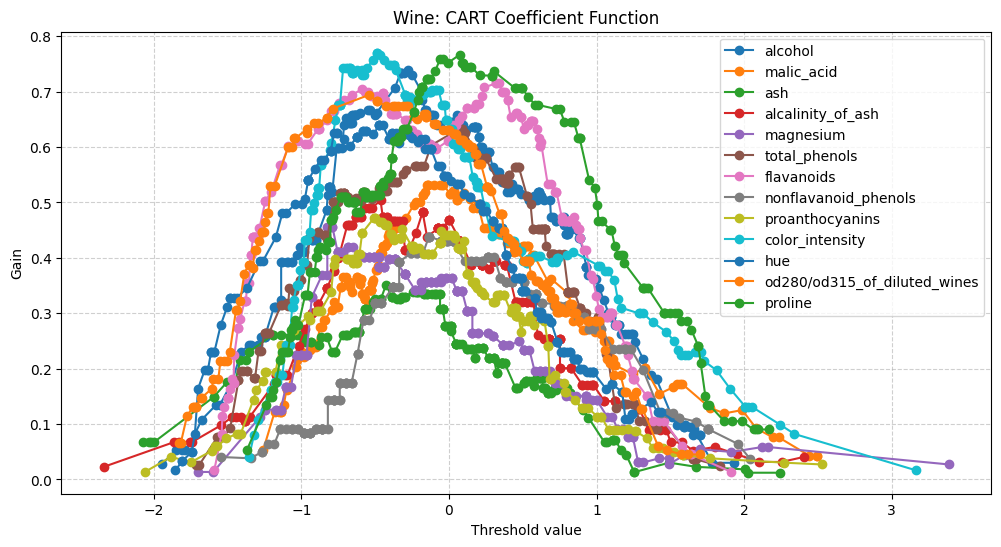

<ipython-input-5-bc5630bda39f>:7: RuntimeWarning: invalid value encountered in divide
  p_parent = parent / total
<ipython-input-5-bc5630bda39f>:26: RuntimeWarning: invalid value encountered in scalar divide
  weighted_entropy = (total_y/total)*entropy_y + (total_n/total)*entropy_n
<ipython-input-5-bc5630bda39f>:34: RuntimeWarning: invalid value encountered in divide
  p_parent = parent / total
<ipython-input-5-bc5630bda39f>:51: RuntimeWarning: invalid value encountered in scalar divide
  weighted_gini = (total_y/total)*gini_y + (total_n/total)*gini_n


Primer punto de corte para 'age' en Heart con Entropy Gain: umbral = 1.1703641899025106, ganancia = 0.008971352229981022
Primer punto de corte para 'sex' en Heart con Entropy Gain: umbral = -0.3855467308297247, ganancia = 0.057984838815778206
Primer punto de corte para 'cp' en Heart con Entropy Gain: umbral = -0.6868945322553376, ganancia = 0.07108682317545245
Primer punto de corte para 'trestbps' en Heart con Entropy Gain: umbral = 1.1843724633911648, ganancia = 0.011519496826074116
Primer punto de corte para 'chol' en Heart con Entropy Gain: umbral = 0.24775744300642616, ganancia = 0.009379007167109599
Primer punto de corte para 'fbs' en Heart con Entropy Gain: umbral = 0.9884017323417255, ganancia = 0.018533396147740744
Primer punto de corte para 'restecg' en Heart con Entropy Gain: umbral = 0.009967492533478728, ganancia = 0.03833496200278308
Primer punto de corte para 'thalach' en Heart con Entropy Gain: umbral = -0.9023539914191386, ganancia = 0.07334472097569389
Primer punto de 

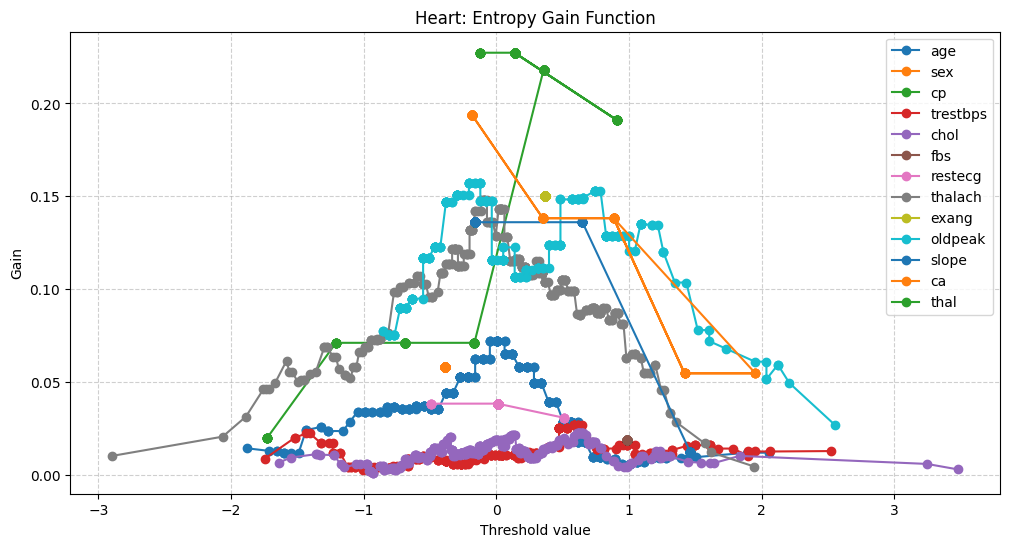

Primer punto de corte para 'age' en Heart con Gini Gain: umbral = 1.1703641899025106, ganancia = 0.0017686477118559196
Primer punto de corte para 'sex' en Heart con Gini Gain: umbral = -0.3855467308297247, ganancia = 0.024877180386985276
Primer punto de corte para 'cp' en Heart con Gini Gain: umbral = -0.6868945322553376, ganancia = 0.02390500733418577
Primer punto de corte para 'trestbps' en Heart con Gini Gain: umbral = 1.1843724633911648, ganancia = 0.00448520752412529
Primer punto de corte para 'chol' en Heart con Gini Gain: umbral = 0.24775744300642616, ganancia = 0.00397521241027754
Primer punto de corte para 'fbs' en Heart con Gini Gain: umbral = 0.9884017323417255, ganancia = 0.003555544747812611
Primer punto de corte para 'restecg' en Heart con Gini Gain: umbral = 0.009967492533478728, ganancia = 0.01073321288763307
Primer punto de corte para 'thalach' en Heart con Gini Gain: umbral = -0.9023539914191386, ganancia = 0.027424377435363967
Primer punto de corte para 'exang' en He

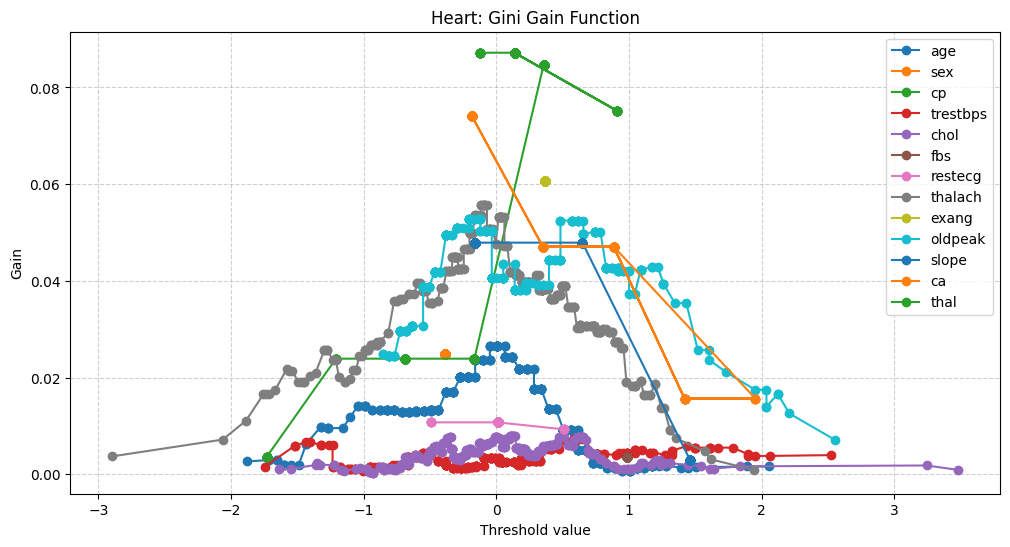

Primer punto de corte para 'age' en Heart con CART Coefficient: umbral = 1.1703641899025106, ganancia = 0.05084468842923896
Primer punto de corte para 'sex' en Heart con CART Coefficient: umbral = -0.3855467308297247, ganancia = 0.2574039582176039
Primer punto de corte para 'cp' en Heart con CART Coefficient: umbral = -0.6868945322553376, ganancia = 0.23087061181365665
Primer punto de corte para 'trestbps' en Heart con CART Coefficient: umbral = 1.1843724633911648, ganancia = 0.06914354801816817
Primer punto de corte para 'chol' en Heart con CART Coefficient: umbral = 0.24775744300642616, ganancia = 0.10556699234279866
Primer punto de corte para 'fbs' en Heart con CART Coefficient: umbral = 0.9884017323417255, ganancia = 0.08522040322844165
Primer punto de corte para 'restecg' en Heart con CART Coefficient: umbral = 0.009967492533478728, ganancia = 0.1891753531788822
Primer punto de corte para 'thalach' en Heart con CART Coefficient: umbral = -0.9023539914191386, ganancia = 0.223551067

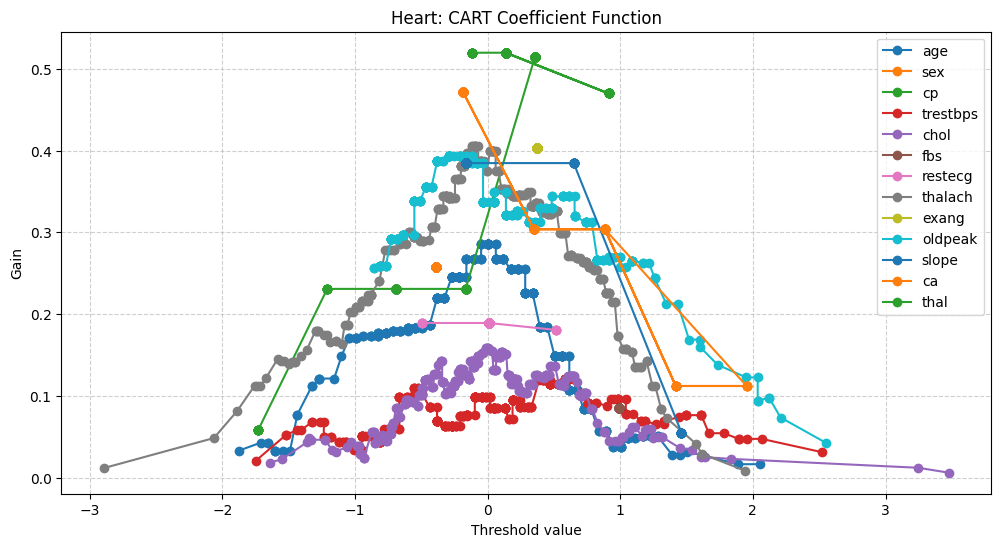

In [ ]:
from sklearn.datasets import load_iris, load_wine
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

# List of gain functions and names
gain_names = ["Entropy Gain", "Gini Gain", "CART Coefficient"]
gain_functions = [gain_in_entropy, gain_in_gini, cart]

# Normalize all columns except the label
def normalize_df(df, exclude_cols):
    cols = [col for col in df.columns if col not in exclude_cols]
    scaler = StandardScaler()
    df[cols] = scaler.fit_transform(df[cols])
    return df

def process_and_plot(df, label, dataset_name):
    # Normalize all columns except the label
    df = normalize_df(df.copy(), exclude_cols=[label])

    # Get all attributes from the dataset
    all_gains = {gain_name: get_gains(df, label, gain_func)
                 for gain_name, gain_func in zip(gain_names, gain_functions)}
    attributes = list(next(iter(all_gains.values())).keys())

    # Create individual figures for each gain function
    for gain_name, gains in all_gains.items():
        plt.figure(figsize=(12, 6))
        for attr in attributes:
            if attr in gains:
                thresh, scores = gains[attr]


                # Sort by threshold so the plot is connected in ascending order
                sorted_pairs = sorted(zip(thresh, scores), key=lambda x: x[0])
                thresh_sorted, scores_sorted = zip(*sorted_pairs)

                # Print first split point
                print(f"Primer punto de corte para '{attr}' en {dataset_name} con {gain_name}: umbral = {thresh[0]}, ganancia = {scores[0]}")


                plt.plot(thresh_sorted, scores_sorted, marker='o', linestyle='-', label=attr)

        plt.xlabel("Threshold value")
        plt.ylabel("Gain")
        plt.title(f"{dataset_name}: {gain_name} Function")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Process iris dataset
iris_data = load_iris(as_frame=True)
df_iris = iris_data.frame
df_iris['target'] = df_iris[iris_data.target_names[iris_data.target.name]] if 'target' not in df_iris.columns else df_iris['target']
df_iris['target'] = df_iris['target'].astype(str) # Ensure label is categorical
process_and_plot(df_iris, 'target', "Iris")

# Process wine dataset
wine_data = load_wine(as_frame=True)
df_wine = wine_data.frame
df_wine['target'] = df_wine['target'].astype(str) # Ensure label is categorical
process_and_plot(df_wine, 'target', "Wine")


# Process with heart
heart_disease = fetch_ucirepo(id=45)
df_heart = heart_disease.data.features
y = heart_disease.data.targets
df_heart['target'] = y
process_and_plot(df_heart, 'target', "Heart")

a) Are there datasets where the choice of the initial split point would be different for different metrics?: Yes, there are cases where the chosen initial split point differs based on the gain function. The optimal split point is typically at the peak of the gain curve for each attribute. Thus, in some datasets and for certain features, different gain functions might lead to different choices for the first split.

b) Are the shapes generally uni-modal? and What is special about CART?:

- Generally, the shapes are unimodal and their highest gain thresholds are the same in Gini and Entropy, in fact, the thresholds are really similar.

- Generally, CART provides gains noticeably higher, from around 0.2 to 0.8 in the splits with the highest gains for example. The distribution of thresholds also do not change.

### Exercise 3 (2 Points)  

Use $sklearn.tree.plot\_tree$ to show the structure of a decision tree  
on iris, wine, and breast cancer once for entropy and once for gini index as split criterion (6  
plots in total).  

The trees should be nicely readable if they have less than 20 elements.  

1. Are trees systematically smaller for one of the two criteria?  
2. Write down the rule that corresponds to the first leaf in the iris dataset.  
3. Also for iris, which attributes are used in how many split points? Is there any attribute  
   that is never used? How is this surprising given the lecture slides?  

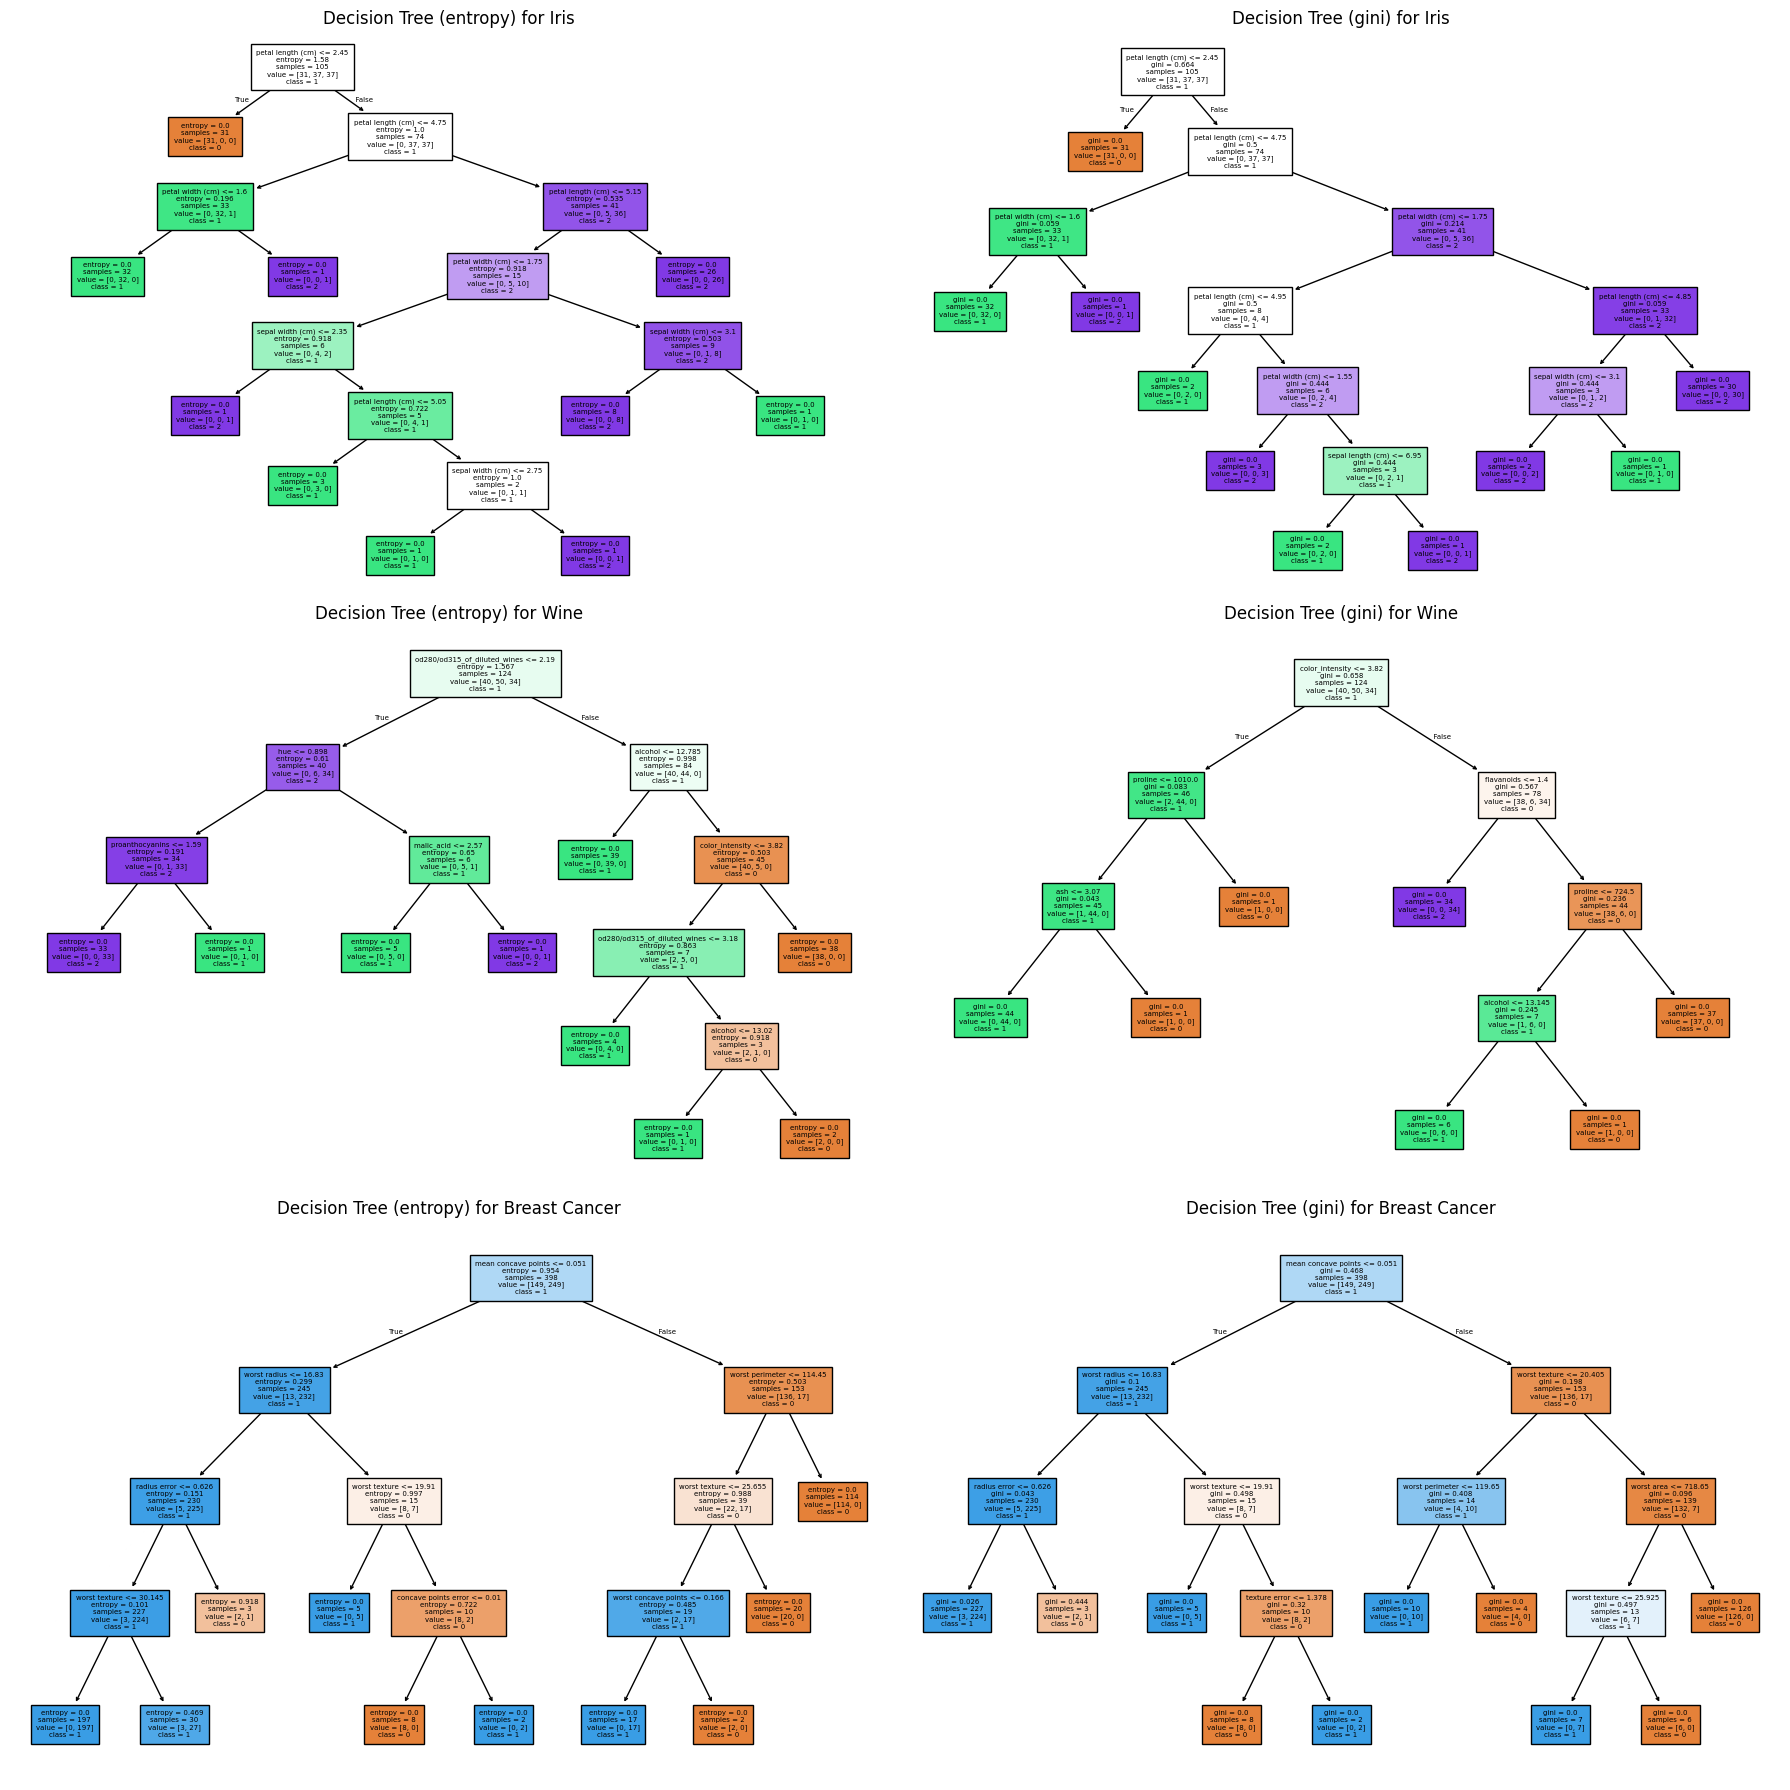


 Pregunta 1: Comparación del tamaño del árbol

Iris: Depth (entropy) = 7, Depth (gini) = 6
Wine: Depth (entropy) = 5, Depth (gini) = 4
Breast Cancer: Depth (entropy) = 4, Depth (gini) = 4

Conclusión:
Podemos observar que los árboles entrenados con 'entropy' suelen tener una profundidad mayor o igual a los árboles entrenados con 'gini'.
Esto sugiere que 'entropy' tiende a generar particiones más profundas para mejorar la pureza de las clases en cada nodo.

 Pregunta 2: Regla del primer nodo hoja en el dataset Iris

First leaf node rule in Iris dataset: Feature petal length (cm) <= 2.449999988079071

Conclusión:
El primer nodo hoja en el árbol de decisión para el dataset Iris se encuentra en la característica 'petal length (cm)' con umbral 2.45.
Esto indica que la primera decisión tomada por el modelo para clasificar es basada en esta característica.

 Pregunta 3: Identificar qué atributos se usaron en Iris

Features used in Iris tree: {'sepal width (cm)', 'petal length (cm)', 'sepal l

In [ ]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Entrenar y graficar los árboles
def train_and_plot(dataset, dataset_name, criterion, ax, max_leaves=10):
    X, y = dataset(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    tree = DecisionTreeClassifier(criterion=criterion, random_state=42,max_leaf_nodes=max_leaves)
    tree.fit(X_train, y_train)

    plot_tree(tree, filled=True,
              feature_names=dataset().feature_names,
              class_names=[str(i) for i in set(y)],
              ax=ax, fontsize =5)
    ax.set_title(f"Decision Tree ({criterion}) for {dataset_name}")

    return tree

# Figura visualizaciones
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

datasets = [(load_iris, "Iris"), (load_wine, "Wine"), (load_breast_cancer, "Breast Cancer")]
criteria = ["entropy", "gini"]

# Diccionario para almacenar los modelos entrenados
trees = {}

# Entrenar y graficar los árboles en cada subplot
for i, (dataset, name) in enumerate(datasets):
    for j, criterion in enumerate(criteria):
        trees[(name, criterion)] = train_and_plot(dataset, name, criterion, axes[i, j])

plt.tight_layout()
plt.show()

# Pregunta 1: Comparación del tamaño del árbol

print("\n Pregunta 1: Comparación del tamaño del árbol\n")

for name in ["Iris", "Wine", "Breast Cancer"]:
    entropy_depth = trees[(name, 'entropy')].get_depth()
    gini_depth = trees[(name, 'gini')].get_depth()
    print(f"{name}: Depth (entropy) = {entropy_depth}, Depth (gini) = {gini_depth}")

#Conclusión sobre la profundidad del árbol
print("\nConclusión:")
print("Podemos observar que los árboles entrenados con 'entropy' suelen tener una profundidad mayor o igual a los árboles entrenados con 'gini'.")
print("Esto sugiere que 'entropy' tiende a generar particiones más profundas para mejorar la pureza de las clases en cada nodo.")

# Pregunta 2: Regla del primer nodo hoja en el dataset Iris

print("\n Pregunta 2: Regla del primer nodo hoja en el dataset Iris\n")

iris_tree = trees[("Iris", 'gini')]
n_nodes = iris_tree.tree_.node_count
children_left = iris_tree.tree_.children_left
children_right = iris_tree.tree_.children_right
feature = iris_tree.tree_.feature
threshold = iris_tree.tree_.threshold

feature_name = load_iris().feature_names

for i in range(n_nodes):
    if children_left[i] == -1 and children_right[i] == -1:
        parent_index = (children_left== i).nonzero()[0]
        if parent_index.size == 0:
            continue
        parent_index = parent_index[0]
        feature_index = feature[parent_index]
        threshold_value = threshold[parent_index]

        feature_name = feature_name[feature_index]

        print(f"First leaf node rule in Iris dataset: Feature {feature_name} <= {threshold_value}")
        break

#Conclusión sobre la primera hoja
print("\nConclusión:")
print(f"El primer nodo hoja en el árbol de decisión para el dataset Iris se encuentra en la característica '{feature_name}' con umbral {threshold_value:.2f}.")
print("Esto indica que la primera decisión tomada por el modelo para clasificar es basada en esta característica.")

# Pregunta 3: Identificar qué atributos se usaron en Iris

print("\n Pregunta 3: Identificar qué atributos se usaron en Iris\n")

feature_names =load_iris().feature_names
used_features = {feature_names[i] for i in feature if i >= 0}
all_features = set(feature_names)
unused_features = all_features - used_features

print(f"Features used in Iris tree: {used_features}")
print(f"Features not used in Iris tree: {unused_features}")

#Conclusión sobre los atributos utilizados
print("\nConclusión:")
print(f"El modelo utilizó las características: {used_features}.")
if unused_features:
    print(f"Las características {unused_features} no fueron utilizadas en ninguna división.")
else:
    print("Todas las características fueron utilizadas en al menos una división.")

### Exercise 4 (1 Point)  

Load the Santander Consumer dataset (id 45566 at openml.org).  
Look at the geometric schedule of dataset sizes $2, 4, 8, 16, 32, 64, \dots$. For each such size (until  
the maximum dataset size), measure the runtime of fit.  

Then create a runtime figure that shows how the runtime grows as a function of the number  
of datapoints.  


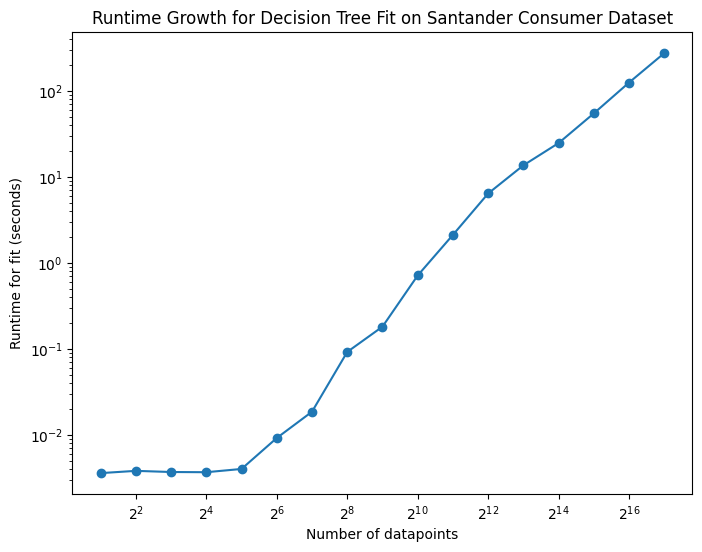

In [ ]:
import time
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Definimos una función que corre un modelo de árbol de decisión para
# una muestra y devuelve el tamaño de la muestra y la duración de
# computación

def runtime_experiment(df, label, random_state=42):
    X = df.drop(columns=[label])
    y = df[label]
    sample_sizes = []
    runtimes = []
    n = 2
    N = len(df)
    while n <= N:
        sample_sizes.append(n)
        # sample n datapoints
        df_sample = df.sample(n=n, random_state=random_state)
        X_sample = df_sample.drop(columns=[label])
        y_sample = df_sample[label]
        clf = DecisionTreeClassifier(random_state=random_state)
        start = time.time()
        clf.fit(X_sample, y_sample)
        end = time.time()
        runtimes.append(end - start)
        n *= 2
    return sample_sizes, runtimes

try:
    santander = fetch_openml(data_id=45566, as_frame=True)
    df_santander = santander.frame
    # Suppose the target column is named 'target'
    if 'target' not in df_santander.columns:
        df_santander['target'] = df_santander.iloc[:,-1]
    # For simplicity, convert target to string
    df_santander['target'] = df_santander['target'].astype(str)

    sizes, times_ = runtime_experiment(df_santander, 'target')
    plt.figure(figsize=(8,6))
    plt.plot(sizes, times_, marker='o')
    plt.xlabel("Number of datapoints")
    plt.ylabel("Runtime for fit (seconds)")
    plt.title("Runtime Growth for Decision Tree Fit on Santander Consumer Dataset")
    plt.xscale("log", base=2)
    plt.yscale("log")
    plt.show()
except Exception as e:
    print("Santander Consumer dataset could not be loaded:", e)